In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model_path = 'C:/Users/aliah/OneDrive/Desktop/Git-uploads/skin_type_classification/mobilenetv2_skin_classification_model.keras'
# Load the model
model = tf.keras.models.load_model(model_path)
resize = 224 

1/1 [==============================] - 1s 1s/step
Predicted Class: acne


<Figure size 640x480 with 0 Axes>

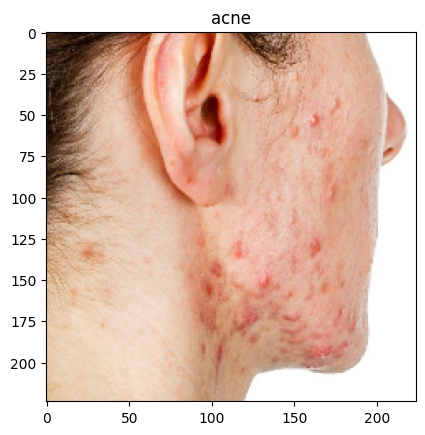

<Figure size 640x480 with 0 Axes>

In [3]:
# labelz = ('dry', 'acne', 'oil')

# image01_path = 'C:/Users/aliah/OneDrive/Desktop/Git-uploads/skin_type_classification/skin_dataset/valid/dry/dry90_jpg.rf.46a961bf41ff94625238eb66e30a23e6.jpg'
image01_path = 'C:/Users/aliah/OneDrive/Desktop/Git-uploads/skin_type_classification/skin_dataset/valid/acne/86_jpg.rf.2b7913996c3ad01cb07f999a4d6719c5.jpg'
# image01 = Image.open(image01_path)

# image01 = cv2.resize(cv2.imread(image01_path), (resize, resize))
# image01 = image01.astype("float") / 255.0
# image01 = image01.reshape((1, image01.shape[0], image01.shape[1], image01.shape[2]))

# predict = model.predict(image01, verbose=1)
# i = predict.argmax(axis=1)[0]
# print(labelz[i])

img = load_img(image01_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array.reshape(1, 224, 224, 3))

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions)
class_names = ['acne', 'dry', 'oil']
predicted_class = class_names[predicted_class_index]

print(f"Predicted Class: {predicted_class}")

plt.title(predicted_class)
plt.imshow(img)
plt.figure('image01')

In [5]:
import pandas as pd

# Load the recommendations data from CSV
recommendations_df = pd.read_csv('C:/Users/aliah/OneDrive/Desktop/Git-uploads/skin_type_classification/chatgpt_recommendations.csv')


predicted_class = predicted_class  

# Convert to lowercase for case-insensitive comparison
predicted_class_lower = predicted_class.lower()

# Filter recommendations based on the predicted skin type (case-insensitive)
filtered_recommendations = recommendations_df[recommendations_df['Skin Type'].str.lower() == predicted_class_lower]

# Display the recommendations
if not filtered_recommendations.empty:
    print(f"Recommendations for {predicted_class} skin type:")
    for index, row in filtered_recommendations.iterrows():
        print(f"Product: {row['Product']}, Recommendation: {row['Recommendation']}, Website: {row['Website']}")
else:
    print(f"No recommendations found for {predicted_class} skin type.")

Recommendations for acne skin type:
Product: CeraVe Foaming Facial Cleanser, Recommendation: Cleanser, Website: Amazon
Product: La Roche-Posay Effaclar Duo Dual Acne Treatment, Recommendation: Treatment, Website: Ulta
Product: Neutrogena Oil-Free Moisture, Recommendation: Moisturizer, Website: Walmart
Product: EltaMD UV Clear Broad-Spectrum SPF 46, Recommendation: Sunscreen, Website: Dermstore
Product: Differin Gel, Recommendation: Spot Treatment, Website: Target
Product: Paula's Choice Skin Perfecting 2% BHA Liquid, Recommendation: Exfoliator, Website: Paula's Choice
Product: Aztec Secret Indian Healing Clay, Recommendation: Mask, Website: Amazon
Product: The Ordinary Niacinamide 10% + Zinc 1%, Recommendation: Serum, Website: Deciem
Product: Neutrogena Oil-Free Acne Moisturizer, Recommendation: Moisturizer with Salicylic Acid, Website: Priceline
Product: Cosrx Acne Pimple Master Patch, Recommendation: Acne Patches, Website: Ulta
Product: Stridex Maximum Strength Pads, Recommendation: 